# Using a Sequential Method to Build a Neural Network
So far, we have built a neural network by defining a class where we define the layers and how the layers are conntcted with each other.
In this section we will learn about a simplified way of definingthe neural network using the `Sequential` class.

1. Define the toy dataset:

In [7]:
x = [[1,2],[3,4],[5,6],[7,8]]
y =[[3],[7],[11],[15]]

2. Import the relevant packages and define the device we will work on:

In [8]:
import torch
import torch.nn as nn
from torch.utils.data import Dataset, DataLoader

device = 'cuda' if torch.cuda.is_available() else 'cpu'
print(device)

cuda


3. Now we define the dataset class(`MyDataset`):

In [9]:
class MyDataset(Dataset):
    def __init__(self, x, y):
        self.x = torch.tensor(x).float().to(device)
        self.y = torch.tensor(y).float().to(device)
    
    def __getitem__(self, idx):
        return self.x[idx], self.y[idx]

    def __len__(self):
        return len(self.x)

4. Define the dataset and dataloader:

In [10]:
dataset = MyDataset(x, y)
dataloader = DataLoader(dataset, batch_size=2, shuffle=True)

5. Define the model architecture using the `Sequential` method availble in `nn` package:

In [11]:
model = nn.Sequential(
    nn.Linear(2,8),
    nn.ReLU(),
    nn.Linear(8, 1)
).to(device)

Note that in the preceeding code, we defined the same architecture of the network as we defined in previous sections, but defined differently.

6. Print a summary of the model we defined in step 5:

In [18]:
from torchsummary import summary
summary(model, torch.zeros(1,2))

Layer (type:depth-idx)                   Output Shape              Param #
├─Linear: 1-1                            [-1, 8]                   24
├─ReLU: 1-2                              [-1, 8]                   --
├─Linear: 1-3                            [-1, 1]                   9
Total params: 33
Trainable params: 33
Non-trainable params: 0
Total mult-adds (M): 0.00
Input size (MB): 0.00
Forward/backward pass size (MB): 0.00
Params size (MB): 0.00
Estimated Total Size (MB): 0.00


Layer (type:depth-idx)                   Output Shape              Param #
├─Linear: 1-1                            [-1, 8]                   24
├─ReLU: 1-2                              [-1, 8]                   --
├─Linear: 1-3                            [-1, 1]                   9
Total params: 33
Trainable params: 33
Non-trainable params: 0
Total mult-adds (M): 0.00
Input size (MB): 0.00
Forward/backward pass size (MB): 0.00
Params size (MB): 0.00
Estimated Total Size (MB): 0.00

Note that oputput shape of first layer is (-1, 8), where -1 represents that there can be as many data points as the batch size, and 8 reprresents that for each data point, we have an eight-dimensional output resulting in an output of the shape batch size x 8. The interpretation for the next two layers is similar.

7. Next, we define the loss function (`loss_func`) and optimizer (`opt`) and train the model, just like we did in the previous section. Note that, in this case, we need not define a model object; a network is not defined within a class in this scenario:

In [19]:
loss_func = nn.MSELoss()
from torch.optim import SGD

opt = SGD(model.parameters(), lr = 0.001)
loss_history = []
for _ in range(50):
    for ix, iy in dataloader:
        opt.zero_grad()
        loss_value = loss_func(model(ix), iy)
        loss_value.backward()
        opt.step()
        loss_history.append(loss_value.cpu().detach().numpy())


Text(0, 0.5, 'loss value')

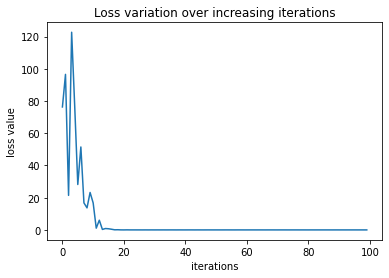

In [21]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.plot(loss_history)
plt.title('Loss variation over increasing iterations')
plt.xlabel('iterations')
plt.ylabel('loss value')

8. Now that we have trained the model, we can predict  values on a validation dataset

In [25]:
v = [[8,9], [10,11], [12,13]]
validation = torch.tensor(v).float().to(device)
print("expected: ", [a+b for a, b in v])
print("validation:", model(validation).view(1, 3))

expected:  [17, 21, 25]
validation: tensor([[16.9686, 20.9532, 24.9378]], device='cuda:0', grad_fn=<ViewBackward0>)


Note that the output of the preceeding code is close to what is expected (which is sumation of the teo input values).